In [1]:
include("minimax.jl")
include("auxiliar.jl")


using Plots
using Distributions
using LaTeXStrings

In [2]:
N = 5
A = rand(Normal(), (N, N))

L5(x::Vector) = dot( x[1:N] , A * x[(N+1):(2 * N)]  ) 

L5 (generic function with 1 method)

In [3]:
OMD  = minimax_solver(L5, "OMD", N, N, 1000, 0.01, false);

In [4]:
ITD  = minimax_solver(L5, "ITD", N, N, 1000, 10, false, 1);

In [5]:
ITD2  = minimax_solver(L5, "ITD", N, N, 1000, 5, false, 2);

In [6]:
IOD  = minimax_solver(L5, "IOD", N, N, 1000, 0.01, false, 1000) ;

In [7]:
FAC  = minimax_solver(L5, "227", N, N, 1000, 10, false, 1);

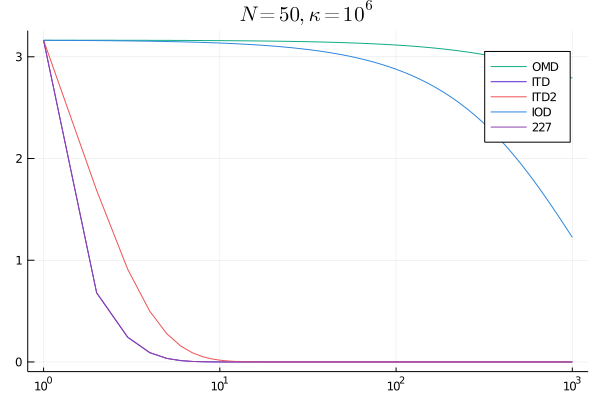

In [15]:
gr()
plot(norm.(OMD.z), label = "OMD",  color = mycolors[1], lw = 1,xaxis = :log)
plot!(norm.(ITD.z), label = "ITD", color = mycolors[2],  lw = 1)
plot!(norm.(ITD2.z), label = "ITD2", color = mycolors[3],  lw = 1)
plot!(norm.(IOD.z), label = "IOD",color = mycolors[4], lw = 1)
plot!(norm.(FAC.z), label = "227",color = mycolors[5], lw = 1)

## Adaptive stepsize method

In [9]:
N = 30
kappa = 1e6

H_xx = Diagonal( range(1, stop = kappa, length = N))
H_yy = - H_xx
H_xy = rand(Normal(), (N,N))
    
L(x::Vector) = dot( x[1:N] , H_xy * x[(N+1):(2 * N)]) + 0.5 * dot( x[1:N] , H_xx * x[1:N] ) + 0.5 * dot( x[(N+1):(2 * N)] , H_yy * x[(N+1):(2 * N)] );

In [10]:
alfa = 2

adapITD = minimax_solver(L, "adaptive ITD", N, N, 10000, alfa, false, 1);
adap227 = minimax_solver(L, "adaptive 227", N, N, 10000, alfa, false, 1);

In [11]:
adapIOD = minimax_solver(L, "adaptive IOD", N, N, 10000, alfa, false, 1);

In [12]:
adap227_zero = minimax_solver(L, "adaptive 227", N, N, 10, alfa, false, 1);
adapITD_zero = minimax_solver(L, "adaptive ITD", N, N, 10000, alfa, adap227_zero.z[10], 1);

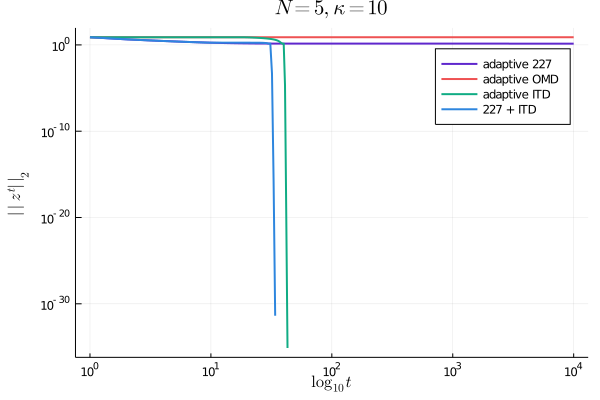

In [13]:
gr(title = L"N = 5, \kappa = 10")#, dpi = 300)
plot(norm.(adap227.z), label = "adaptive 227",  color = mycolors[2], lw = 2,xaxis = :log, yaxis = :log)
plot!(norm.(adapIOD.z), label = "adaptive OMD",  color = mycolors[3], lw = 2,xaxis = :log)
plot!(norm.(adapITD.z), label = "adaptive ITD",  color = mycolors[1], lw = 2,xaxis = :log,  xlabel = L"\log_{10} t", ylabel = L"|| z^t ||_2")
plot!(norm.(vcat(adap227_zero.z, adapITD_zero.z)), label = "227 + ITD",  color = mycolors[4], lw = 2,xaxis = :log)

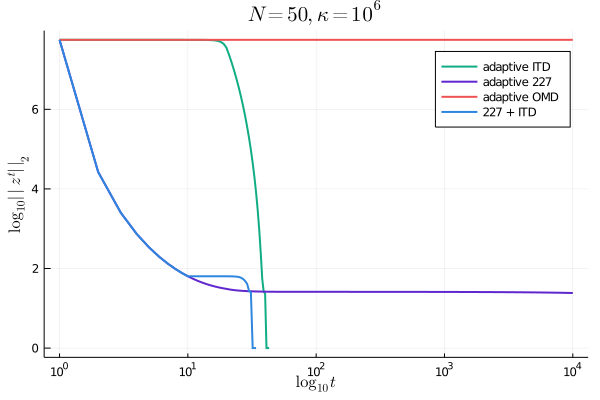

In [16]:
gr(title = L"N = 50, \kappa = 10^{6}")#, dpi = 300)
plot(norm.(adapITD.z), label = "adaptive ITD",  color = mycolors[1], lw = 2,xaxis = :log,  xlabel = L"\log_{10} t", ylabel = L"\log_{10} || z^t ||_2")
plot!(norm.(adap227.z), label = "adaptive 227",  color = mycolors[2], lw = 2,xaxis = :log)
plot!(norm.(adapIOD.z), label = "adaptive OMD",  color = mycolors[3], lw = 2,xaxis = :log)
plot!(norm.(vcat(adap227_zero.z, adapITD_zero.z)), label = "227 + ITD",  color = mycolors[4], lw = 2,xaxis = :log)